In [15]:
!python -m spacy download es_core_news_sm

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.9/12.9 MB 53.6 MB/s eta 0:00:00a 0:00:01

[notice] A new release of pip is available: 24.3.1 -> 25.2
[notice] To update, run: pip install --upgrade pip
✔ Download and installation successful
You can now load the package via spacy.load('es_core_news_sm')


In [16]:
import pandas as pd
from transformers import pipeline
import spacy

In [17]:
clientes = pd.read_csv("../datos/clientes.csv")
comentarios = pd.read_csv("../datos/comentarios.csv")
productos = pd.read_csv("../datos/productos.csv")
historial = pd.read_csv("../datos/historial_compras.csv")

df = (comentarios
      .merge(clientes, on="id_cliente")
      .merge(productos, on="id_producto", suffixes=("_comentario", "_producto"))
      .merge(historial, on=["id_cliente", "id_producto"], how="left"))

df.head()

,id_comentario,id_cliente,id_producto,calificacion,texto_comentario,fecha_comentario,nombre,email,ciudad,pais,fecha_registro,nombre_producto,categoria,subcategoria,precio,descripcion,id_compra,cantidad,fecha_compra
0,1,1,2,5,El Smartphone Nexus 5G es un cambio de juego. ...,2024-05-20,Ana Martínez,ana.m@email.com,Madrid,España,2024-05-10,Smartphone Nexus 5G,Electrónica,Smartphones,899.5,El Smartphone Nexus 5G redefine la experiencia...,1.0,1.0,2024-05-20
1,1,1,2,5,El Smartphone Nexus 5G es un cambio de juego. ...,2024-05-20,Ana Martínez,ana.m@email.com,Madrid,España,2024-05-10,Smartphone Nexus 5G,Electrónica,Smartphones,899.5,El Smartphone Nexus 5G redefine la experiencia...,101.0,1.0,2024-08-28
2,1,1,2,5,El Smartphone Nexus 5G es un cambio de juego. ...,2024-05-20,Ana Martínez,ana.m@email.com,Madrid,España,2024-05-10,Smartphone Nexus 5G,Electrónica,Smartphones,899.5,El Smartphone Nexus 5G redefine la experiencia...,201.0,1.0,2024-12-06
3,2,2,4,4,La Camiseta Deportiva Ultralight es muy cómoda...,2024-05-21,Carlos Sánchez,carlos.s@email.com,Ciudad de México,México,2024-05-11,Camiseta Deportiva Ultralight,Ropa,Camisetas,35.0,Camiseta técnica de alto rendimiento para depo...,2.0,2.0,2024-05-21
4,2,2,4,4,La Camiseta Deportiva Ultralight es muy cómoda...,2024-05-21,Carlos Sánchez,carlos.s@email.com,Ciudad de México,México,2024-05-11,Camiseta Deportiva Ultralight,Ropa,Camisetas,35.0,Camiseta técnica de alto rendimiento para depo...,102.0,1.0,2024-08-29


In [18]:
sentiment_model = pipeline("sentiment-analysis", model="nlptown/bert-base-multilingual-uncased-sentiment")

df["sentimiento"] = df["texto_comentario"].apply(lambda x: sentiment_model(x)[0]["label"])
df["confianza"] = df["texto_comentario"].apply(lambda x: sentiment_model(x)[0]["score"])

df.head()

Device set to use mps:0


,id_comentario,id_cliente,id_producto,calificacion,texto_comentario,fecha_comentario,nombre,email,ciudad,pais,...,nombre_producto,categoria,subcategoria,precio,descripcion,id_compra,cantidad,fecha_compra,sentimiento,confianza
0,1,1,2,5,El Smartphone Nexus 5G es un cambio de juego. ...,2024-05-20,Ana Martínez,ana.m@email.com,Madrid,España,...,Smartphone Nexus 5G,Electrónica,Smartphones,899.5,El Smartphone Nexus 5G redefine la experiencia...,1.0,1.0,2024-05-20,5 stars,0.695212
1,1,1,2,5,El Smartphone Nexus 5G es un cambio de juego. ...,2024-05-20,Ana Martínez,ana.m@email.com,Madrid,España,...,Smartphone Nexus 5G,Electrónica,Smartphones,899.5,El Smartphone Nexus 5G redefine la experiencia...,101.0,1.0,2024-08-28,5 stars,0.695212
2,1,1,2,5,El Smartphone Nexus 5G es un cambio de juego. ...,2024-05-20,Ana Martínez,ana.m@email.com,Madrid,España,...,Smartphone Nexus 5G,Electrónica,Smartphones,899.5,El Smartphone Nexus 5G redefine la experiencia...,201.0,1.0,2024-12-06,5 stars,0.695212
3,2,2,4,4,La Camiseta Deportiva Ultralight es muy cómoda...,2024-05-21,Carlos Sánchez,carlos.s@email.com,Ciudad de México,México,...,Camiseta Deportiva Ultralight,Ropa,Camisetas,35.0,Camiseta técnica de alto rendimiento para depo...,2.0,2.0,2024-05-21,4 stars,0.596878
4,2,2,4,4,La Camiseta Deportiva Ultralight es muy cómoda...,2024-05-21,Carlos Sánchez,carlos.s@email.com,Ciudad de México,México,...,Camiseta Deportiva Ultralight,Ropa,Camisetas,35.0,Camiseta técnica de alto rendimiento para depo...,102.0,1.0,2024-08-29,4 stars,0.596878


Batches: 100%|██████████| 32/32 [00:00<00:00, 68.80it/s]
2025-10-07 21:35:34,340 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2025-10-07 21:35:34,979 - BERTopic - Dimensionality - Completed ✓
2025-10-07 21:35:34,980 - BERTopic - Cluster - Start clustering the reduced embeddings
2025-10-07 21:35:34,992 - BERTopic - Cluster - Completed ✓
2025-10-07 21:35:34,993 - BERTopic - Representation - Fine-tuning topics using representation models.
2025-10-07 21:35:35,012 - BERTopic - Representation - Completed ✓



=== Tópicos con sentimiento promedio y polaridad ===
 Topic                                          Name  sentimiento_promedio Polaridad
    -1                            -1_en_la_es_lluvia              3.521739  Positivo
     0          0_sonido_auriculares_cancelación_los              3.207792  Positivo
     1                         1_ollas_se_set_cocina              3.709677  Positivo
     2          2_cámara_grabar_estabilización_video              3.056604  Positivo
     3        3_camiseta_ejercicio_seca_transpirable              3.547170  Positivo
     4                4_trama_personajes_historia_me              2.163265   Neutral
     5            5_balón_durabilidad_agarre_control              4.000000  Positivo
     6                 6_suela_cómodas_son_estéticas              2.333333   Neutral
     7                   7_gamer_pro_gráfica_tarjeta              3.250000  Positivo
     8              8_comprado_sueño_laptop_pantalla              2.933333  Positivo
     9     

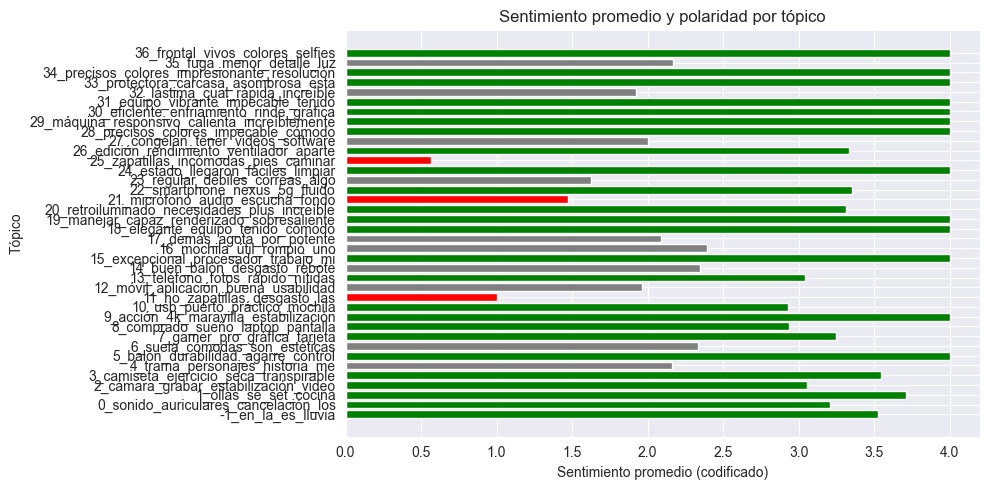

In [19]:
from bertopic import BERTopic
from sentence_transformers import SentenceTransformer
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

encoder = LabelEncoder()
df["sentimiento_codificado"] = encoder.fit_transform(df["sentimiento"])

embedding_model = SentenceTransformer("all-MiniLM-L6-v2")
embeddings = embedding_model.encode(df["texto_comentario"], show_progress_bar=True)

topic_model = BERTopic(language="spanish", verbose=True)
topics, probs = topic_model.fit_transform(df["texto_comentario"], embeddings)
df["topic"] = topics

topic_sentiment = df.groupby("topic")["sentimiento_codificado"].mean().reset_index()
topic_sentiment.columns = ["topic", "sentimiento_promedio"]

topic_info = topic_model.get_topic_info()
topic_col = "topic" if "topic" in topic_info.columns else "Topic"

topic_info = topic_info.merge(topic_sentiment, left_on=topic_col, right_on="topic", how="left")
topic_info.drop(columns=["topic"], inplace=True, errors="ignore")

def polaridad(valor):
    if valor < 1.5:
        return "Negativo"
    elif valor < 2.5:
        return "Neutral"
    else:
        return "Positivo"

topic_info["Polaridad"] = topic_info["sentimiento_promedio"].apply(polaridad)

cols_to_show = [c for c in [topic_col, "Name", "sentimiento_promedio", "Polaridad"] if c in topic_info.columns]
print("\n=== Tópicos con sentimiento promedio y polaridad ===")
print(topic_info[cols_to_show].to_string(index=False))

color_map = {"Positivo": "green", "Neutral": "gray", "Negativo": "red"}
topic_info["Color"] = topic_info["Polaridad"].map(color_map)

plt.figure(figsize=(10, 5))
plt.barh(topic_info["Name"], topic_info["sentimiento_promedio"], color=topic_info["Color"])
plt.xlabel("Sentimiento promedio (codificado)")
plt.ylabel("Tópico")
plt.title("Sentimiento promedio y polaridad por tópico")
plt.tight_layout()
plt.show()

In [21]:
print("\n=== Ejemplos de comentarios representativos ===")
for topic_id in topic_info["Topic"].head(5):  # muestra solo los primeros 5 tópicos
    if topic_id == -1:
        continue  # -1 = outliers
    subset = df[df["topic"] == topic_id]["texto_comentario"].head(3).tolist()
    print(f"\nTópico {topic_id}: {topic_model.get_topic(topic_id)}")
    for i, comentario in enumerate(subset, 1):
        print(f"   {i}. {comentario}")


=== Ejemplos de comentarios representativos ===

Tópico 0: [('sonido', np.float64(0.08605256221840325)), ('auriculares', np.float64(0.06854287799957694)), ('cancelación', np.float64(0.04445745763382139)), ('los', np.float64(0.044304606399345456)), ('estable', np.float64(0.039844883766523634)), ('claro', np.float64(0.039844883766523634)), ('ruido', np.float64(0.03829834717400522)), ('dura', np.float64(0.03511089378901657)), ('música', np.float64(0.03364279980143154)), ('cómodos', np.float64(0.03355798316060179))]
   1. Los Auriculares Inalámbricos X ofrecen un sonido nítido y potente. La conexión Bluetooth es estable y no se interrumpe, lo cual es muy importante para mí. La única pega es que la cancelación de ruido no es tan efectiva en ambientes muy ruidosos, como el transporte público o una cafetería llena de gente. Aún así, para escuchar música en casa o en la oficina, son perfectos.
   2. Los Auriculares Inalámbricos X ofrecen un sonido nítido y potente. La conexión Bluetooth es es